In [203]:
#https://ichi.pro/th/kar-phyakrn-xnukrm-wela-kar-chi-phlangngan-dwy-model-kar-reiyn-ru-cheing-luk-python-laea-lstm-133396902291350

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [204]:
#http://berkeleyearth.org/air-pollution-overview/

from pandas import read_csv
from datetime import datetime

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
	
df = pd.read_csv('Thailand.csv', usecols=[0,1,2,3,4], engine='python', 
				parse_dates = [['Year', 'Month', 'Day', 'Hour']], 
				index_col=0, date_parser=parse)
df.index.name = 'date'
df 

,PM2.5
date,
2016-03-03 08:00:00,53.99
2016-03-03 09:00:00,53.95
2016-03-03 10:00:00,54.10
2016-03-03 11:00:00,53.93
2016-03-03 12:00:00,41.23
...,...
2022-03-13 17:00:00,56.30
2022-03-13 18:00:00,53.34
2022-03-13 19:00:00,51.25


In [205]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM2.5,46904.0,24.04,13.63,4.02,13.14,19.49,33.05,131.54


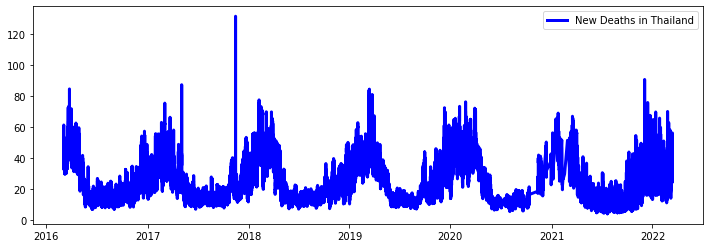

In [206]:
#มลพิษ ประเทศไทย ค่า PM 2.5 ไม่ควรเกิน 50 ไมโครกรัมต่อลูกบาศก์เมตรใน 24 ชั่วโมง

plt.figure(figsize=(12, 4))
plt.plot(df, 'b', lw=3.0, label='New Deaths in Thailand')
plt.legend()
plt.show()

In [207]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46904 entries, 2016-03-03 08:00:00 to 2022-03-13 21:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   46904 non-null  float64
dtypes: float64(1)
memory usage: 732.9 KB


(46904, 1)

##### การแบ่งข้อมูลใช้ในการ train และ test

In [208]:
n_train = int(df.shape[0] * 0.80)
n_train

37523

##### การแปลงข้อมูลให้เป็น Normalize คือแปลงข้อมูลให้เป็นเลข 0-1

In [209]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:5]

array([[0.3918601 ],
       [0.39154642],
       [0.39272271],
       [0.39138959],
       [0.29179737]])

##### สร้างฟังก์ชันเพื่อเตรียมข้อมูลให้เป็น matrix ใช้ step = 2

In [210]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

##### การแบ่งข้อมูลเพื่อใช้ในการ train และ test 

In [211]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((37523, 1), (9381, 1))

In [212]:
X

array([[0.3918601 ],
       [0.39154642],
       [0.39272271],
       ...,
       [0.09120138],
       [0.09308344],
       [0.08484944]])

In [213]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:
    """
    A method to create X and Y matrix from a time series list for the training of 
    deep learning models 
    """
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [214]:
# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Defining the number of neurons in the LSTM layer
n_layer = 50

# Defining how many lags will be used in the time series
n_lag = 3

# Defining the model
model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))

# The objective functions which will be minimized is mean squared error (mse)
model.compile(optimizer='adam', loss='mse')

In [215]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [218]:
# Initiating the class
deep_learner = DeepModelTS(
data = df,
Y_var = 'PM2.5',
lag = 6,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [219]:
# Fitting the model
model = deep_learner.LSTModel()

Epoch 1/10
156/156 [==============================] - 2s 7ms/step - loss: 52.3904 - val_loss: 36.8892
Epoch 2/10
156/156 [==============================] - 1s 6ms/step - loss: 11.4275 - val_loss: 25.4451
Epoch 3/10
156/156 [==============================] - 1s 6ms/step - loss: 8.4265 - val_loss: 22.0844
Epoch 4/10
156/156 [==============================] - 1s 7ms/step - loss: 9.1156 - val_loss: 26.4407
Epoch 5/10
156/156 [==============================] - 1s 8ms/step - loss: 9.1395 - val_loss: 22.6992
Epoch 6/10
156/156 [==============================] - 1s 8ms/step - loss: 8.7694 - val_loss: 18.6685
Epoch 7/10
156/156 [==============================] - 1s 8ms/step - loss: 7.8399 - val_loss: 19.4147
Epoch 8/10
156/156 [==============================] - 1s 8ms/step - loss: 7.7043 - val_loss: 17.2073
Epoch 9/10
156/156 [==============================] - 1s 8ms/step - loss: 7.3448 - val_loss: 16.6290
Epoch 10/10
156/156 [==============================] - 1s 8ms/step - loss: 7.2940 - val_l

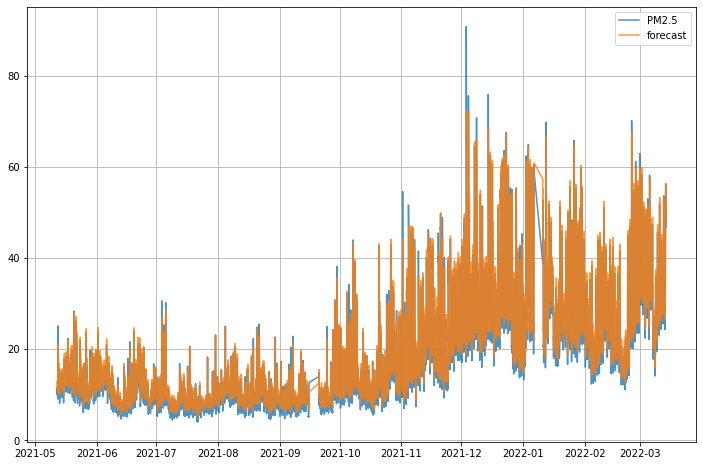

In [220]:
#มลพิษ ประเทศไทย ค่า PM 2.5 ไม่ควรเกิน 50 ไมโครกรัมต่อลูกบาศก์เมตรใน 24 ชั่วโมง

yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['PM2.5', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [225]:
#Creating the model using full data and forecasting n steps ahead

deep_learner = DeepModelTS(
    data=df,
    Y_var='PM2.5',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 720 # ข้อมูล 30 วัน 
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
184/184 [==============================] - 12s 59ms/step - loss: 211.0515
Epoch 2/10
184/184 [==============================] - 15s 79ms/step - loss: 16.8995
Epoch 3/10
184/184 [==============================] - 15s 82ms/step - loss: 16.0028
Epoch 4/10
184/184 [==============================] - 15s 82ms/step - loss: 12.0060
Epoch 5/10
184/184 [==============================] - 15s 83ms/step - loss: 9.6330
Epoch 6/10
184/184 [==============================] - 15s 84ms/step - loss: 9.6950
Epoch 7/10
184/184 [==============================] - 15s 84ms/step - loss: 11.1724
Epoch 8/10
184/184 [==============================] - 15s 83ms/step - loss: 9.2814
Epoch 9/10
184/184 [==============================] - 15s 83ms/step - loss: 7.6957
Epoch 10/10
184/184 [==============================] - 16s 85ms/step - loss: 9.5313


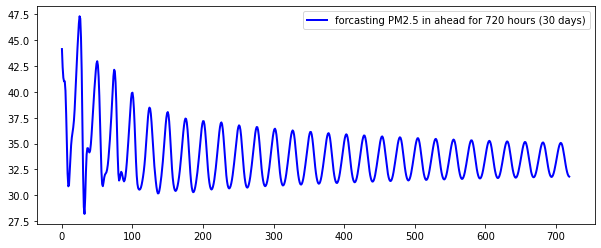

In [317]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 720 hours (30 days)')
plt.legend()
plt.show()

In [313]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,44.0
1,42.0
2,41.0
3,41.0
4,41.0
...,...
715,33.0
716,32.0
717,32.0
718,32.0


In [312]:
#มลพิษ ประเทศไทย ค่า PM 2.5 ไม่ควรเกิน 50 ไมโครกรัมต่อลูกบาศก์เมตรใน 24 ชั่วโมง

ypred.mean().round(0)

พยากรณ์ PM2.5    34.0
dtype: float32